### Задание 1

Выберите один верный ответ. “Коэффициент корреляции между количеством сна и уровнем счастья равен нулю” - это...

* V 1) Нулевая гипотеза
* 2) Альтернативная гипотеза


### Задание 2

Выберите один верный ответ. Если уровень значимости 0.10, а p-значение равно 0.7, то необходимо...

* 1)отвергнуть нулевую гипотезу
* V 2)не отвергать нулевую гипотезу


### Задание 3

Выберите все подходящие ответы. Что из перечисленного является 
статистической гипотезой?

* V 1)  Случайная величина X имеет 
     нормальное распределение
* V 2)  Среднее арифметическое 
     признака A равно 52.5
* V 3)  Средний вес упаковки яблок составляет 1300 г.
* 4)  Дисперсия случайной величины X 
     не больше 5

### Задание 4

Парфюмерная компания хочет узнать возраст женщин, которые являются их покупательницами. Ранее уже было изучено, что средний возраст  был 37, а среднеквадратичное отклонение равно 3.4. Размер выборки - 200 человек. Рассчитайте 95% доверительный интервал для среднего возраста. Представьте все необходимые вычисления.

In [1]:
from scipy.stats import norm
import math

def confidence_interval_norm(alpha, sigma, n, mean):
    value = -norm.ppf(alpha / 2) * sigma / math.sqrt(n)
    return mean - value, mean + value

In [2]:
n = 200
mean = 37
sigma = 3.4
alpha = (1 - 0.95)/2 # Ограничение с 2х сторон, поэтому делим пополам
confidence_interval_norm(alpha, sigma, n, mean)

(36.46113023685977, 37.53886976314023)

### Задание 5

Перед Вами данные результатов экзаменов для детей средней школы.

In [3]:
import pandas as pd
df=pd.read_csv('https://downloader.disk.yandex.ru/disk/f4922a21f246ea369bbdd3ccba31a2b854355869d2a33e475b136269cca01324/5f7baaa8/NEiG_7SRvvlfSXxW98JfJbXKaJq7VIzDzkZHxhdDRk6EMNdUX87DVkVHAbfTn2U-VNR0mnI2AOPMEA42F2mnoA%3D%3D?uid=0&filename=examscore.csv&disposition=attachment&hash=F5iM3qEKomD0PQ8CvzSLg5VlPUKw%2B0yTjEfj73fSMqJ8SNYOVLgjH5CiX3iliVmnsLK2WbwBkR//qfmVHoPilw%3D%3D&limit=0&content_type=application%2Fvnd.ms-excel&owner_uid=1130000041608349&fsize=56628&hid=4172a4b59290db62a4ddd9bd2bc4e507&media_type=spreadsheet&tknv=v2')

In [4]:
df

,gender,race,parenteducation,lunch,testprepcourse,mathscore,readingscore,writingscore
0,female,group A,some high school,standard,completed,78,83,85
1,female,group C,some high school,standard,none,69,71,78
2,female,group B,bachelor's degree,free/reduced,completed,58,65,71
3,female,group C,some college,standard,none,69,72,70
4,female,group C,high school,standard,none,67,72,67
...,...,...,...,...,...,...,...,...
995,male,group A,some college,standard,none,68,60,55
996,male,group C,associate's degree,free/reduced,none,76,70,66
997,male,group B,some high school,standard,completed,50,43,44
998,male,group D,some college,free/reduced,none,34,28,22


Обработайте данные на предмет пропусков и проверьте гипотезу о том, что между средними оценками по математике для мальчиков и девочек нет статистических различий. Представьте все необходимые вычисления и содержательную интерпретацию.

## Обработка пропусков

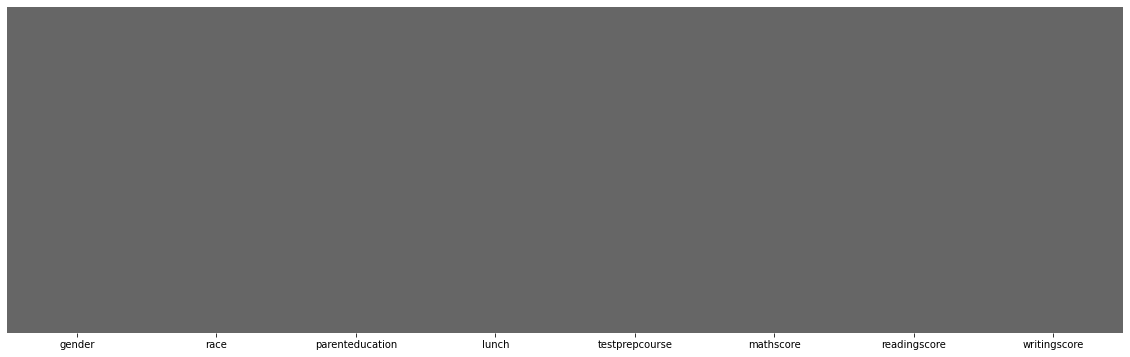

In [5]:
# Взглянем на имеющиеся пропуски
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

fig, ax = plt.subplots(figsize=(20,6))
sns_heatmap = sns.heatmap(df.isnull(), yticklabels=False, cbar=False, cmap='Accent_r')

In [6]:
df.isnull().sum()

gender             0
race               0
parenteducation    0
lunch              0
testprepcourse     0
mathscore          0
readingscore       0
writingscore       0
dtype: int64

Видим, что очевидные пропуски (.isnull()==True) отсутствуют. Изучим столбцы по отдельности на наличие отклоняющихся и пустых значений

In [7]:
# gender -  пол
# race - этническая принадлежность
# parenteducation - образование родителей
# lunch - ели перед экзаменом
# testprepcourse - курсы для подготовки к экзаменам
# mathscore - оценка по математике 
# readingscore - оценка по чтению
# writingscore - оценка по письму

for column in (df.columns.values):
    if (df[column].dtype) != np.dtype('int'):
        print ("Уникальные значения столбца '"+ column + "': ", end='')
        print (df[column].unique())

Уникальные значения столбца 'gender': ['female' 'male']
Уникальные значения столбца 'race': ['group A' 'group C' 'group B' 'group D' 'group E']
Уникальные значения столбца 'parenteducation': ['some high school' "bachelor's degree" 'some college' 'high school'
 "associate's degree" "master's degree"]
Уникальные значения столбца 'lunch': ['standard' 'free/reduced']
Уникальные значения столбца 'testprepcourse': ['completed' 'none']
Уникальные значения столбца 'mathscore': [ 78  69  58  67  60  87  76  66  61  51  83  57  63  86  56  85  92  52
  32  64  73  37  74  49  59  68  44  62  31  72  53  40  84  50  55  71
  45  39  38  80  47  43  48  81  94  89  88  41  46  77  99  95  82  79
  70 100  35  96  75  54  65  20  42  36  30  18  17  90  33  23  19  91
  29  93 -77  97  24  28  98  34]
Уникальные значения столбца 'readingscore': [ 83  71  65  72  81  94  92  70  75  73 100  60  91  96  68  58  49  69
  57  52  63  55  67  86  62  74  51  48  78  47  82  50  84  77  85  90
  93  88  

Видим, что пустых значений и правда нет, зато есть отклоняющиеся отрицательные значения оценок. Скорее всего минус попал случайно. Заменим их

In [8]:
df.mathscore = df.mathscore.apply(lambda x: -x if x<0 else x)

В значениях только девочки и мальчики и даже без заметного перекоса, что хорошо для выборки и проверки гипотезы

male      515
female    485
Name: gender, dtype: int64


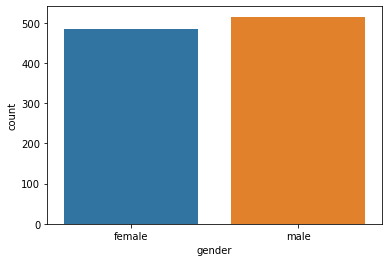

In [9]:
print(df.gender.value_counts())
sns.countplot(x = 'gender', data = df);

## Проверка гипотезы 
Между средними оценками по математике для мальчиков и девочек нет статистических различий

        mathscore
gender           
female  62.851546
male    69.067961


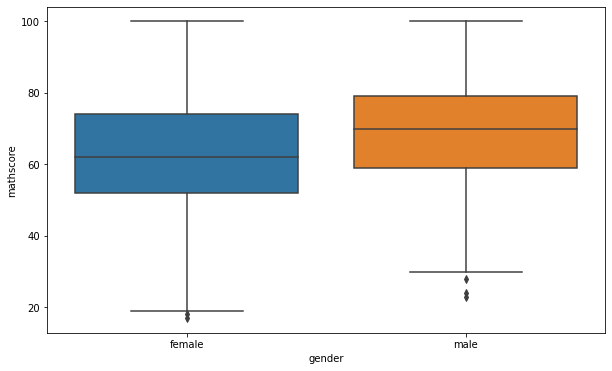

In [10]:
mathscore_gender = df[['gender','mathscore']].groupby('gender',as_index=True).mean()
print(str(mathscore_gender.head()))
fig, ax = plt.subplots(figsize=(10,6))
sns.boxplot(x="gender", y="mathscore", data=df);

Видим, что различие между средними оценками девочек и мальчиков есть. Поэтому гипотезу "между средними оценками по математике для мальчиков и девочек нет статистических различий" мы опровергаем.

### Задание 6

Вам предложены данные A/B теста. Проанализируйте, есть ли статистически значимая разница для конверсии в контрольной и экспериментальной группе.

Данные содержат 5 признаков:
    
* user_id - ID пользователя
* timestamp - Временная отметка
* group - К какой группе относится пользователь (контрольная или экспериментальная)
* landing_page - Какой дизайн показали пользователю {old_page, new_page}
* converted - Конверсия (0=not converted, 1=converted)

Не забудьте проверить и подготовить данные, сделать всю необходимую предобработку.

In [11]:
import random

dfab = pd.read_csv('https://downloader.disk.yandex.ru/disk/07ff894a533b0dbbcd18523e9cdf12a964a16cefec26164d83724ae91063d0d8/5f7bab75/fgcOCwfu8pOIN6v2eFULZG7-HiYxiiq7EztzXfCsfwGZvqHlO_nLBpZ2MQ_CIugD4LT4X3txWURIuArD4PjwKg%3D%3D?uid=0&filename=ab_data.csv&disposition=attachment&hash=F5iM3qEKomD0PQ8CvzSLg6kDWqsmlrTtKYr1MlqEwKRhi2vkkDeh8eOL8q6U7fwBMrZMrpRHvcl9PkWNPWglZQ%3D%3D&limit=0&content_type=text%2Fplain&owner_uid=1130000041608349&fsize=15901933&hid=cd4ad67a26b87a37499de6bf645d2889&media_type=spreadsheet&tknv=v2')

dfab.head()
random.seed(100)

In [12]:
# Проверим пользователей на повторение в выборке

dfab.user_id.nunique()

290584

In [13]:
dfab.shape[0]

294478

Большое количество пользователей продублировано

In [14]:
# Удалим дубликаты 

dfab.drop_duplicates(subset='user_id', keep='first', inplace=True)

In [15]:
# Доля пользователей с конверсией

dfab[dfab.converted == 1].converted.count() / dfab.converted.count()

0.1195695564793657

In [16]:
# Доля пользователей с конверсией из контрольной группы

dfab[dfab.converted == 1].query('group == "control"').converted.count() / dfab.query('group == "control"').converted.count()

0.12029717968491792

In [17]:
# Доля пользователей с конверсией из экспериментальной группы

dfab[dfab.converted == 1].query('group == "treatment"').converted.count() / dfab.query('group == "treatment"').converted.count()

0.11884253398646046

Доли пользователей из групп примерно равны

In [18]:
# Количество конверсий для каждой страницы и количество людей, получивших каждую страницу

import statsmodels.api as sm

convert_old = (dfab.query('landing_page=="old_page"')['converted']==1).sum()
convert_new = (dfab.query('landing_page=="new_page"')['converted']==1).sum()
n_old = (dfab['landing_page']=='old_page').sum()
n_new=(dfab['landing_page']=='new_page').sum()

convert_old, convert_new, n_old, n_new  

(17489, 17256, 145264, 145320)

## Гипотезы

* H0: p_old = p_new  
Пользователи, получившие старую целевую страницу, будут иметь те же показатели конверсии, что и пользователи, получившие новую целевую страницу

* H1: p_old < p_new
Пользователи, получившие новую целевую страницу, будут иметь более высокий показатель конверсии по сравнению с пользователи, получившими старую целевую страницу

Установим уровень доверия alpha = 0.05

In [19]:
z_score, p_value = sm.stats.proportions_ztest([convert_new, convert_old], [n_new, n_old], alternative='larger')
z_score, p_value

(-1.3704617576931086, 0.9147285973840954)

z_score составляет 1.37, что меньше критического значения 1.64 для alpha = 0.05. Значение p_value = 0.9, больше aplha = 0.05.

Мы не можем отклонить нулевую гипотезу, поэтому делаем вывод, что статистически значимой разницы для конверсии в контрольной и экспериментальной группе нет.